## Lecture 3: ML Models

In this lecture we are going to build upon the knowledge of last week. In addition to this notebook there are a few slides that explain the various ML models slighly deeper. 

This week you will learn:
* The difference between supervised and unsupervised ML.
* The difference between regression and classification. 
* How to train supervised and unsupervised ML models.

![alt text](../../static/images/03_lecture/0002.jpg "Title")

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Linear Regression

![alt text](../../static/images/03_lecture/0004.jpg "Title")

![alt text](../../static/images/03_lecture/0005.jpg "Title")

![alt text](../../static/images/03_lecture/0006.jpg "Title")

We are going to generate our own data so that it fits the linear regression model. The data are generated as $y = \alpha +\beta X + \epsilon$. In the previous equation, y is the target or the response, $\alpha$ is the intercept, $\beta$ is the slope, $X$ are the features and $\epsilon$ is an error term because data are normally quite noisey. 

In [2]:
def generate_dataset(beta, alpha, std_dev, n):

  np.random.seed(123)
  
  # Generate x as an array of `n` samples which can take a value between 0 and 10
  X = np.random.random(n) * 10

  # Generate the random error of n samples, with a random value from a normal distribution, with a standard
  # deviation provided in the function argument
  e = np.random.randn(n) * std_dev
  
  # Calculate `y` according to the equation discussed
  y = alpha + X * beta + e
  return X, y

Using the function above you can generate data (you can modify the parameters!). 

In [3]:
X_linear, y_linear = generate_dataset(beta=-2, alpha=2, n=60, std_dev=10)

We load the data in a pd DataFrame.

In [4]:
linear_df = pd.DataFrame(
    {
    'X' : X_linear,
    'y' : y_linear
    }
)


We split the data in a train and a test using sklearn.

In [5]:
from sklearn.model_selection import train_test_split

train_linear_df, test_linear_df = train_test_split(linear_df, test_size=0.2, random_state=123)

We plot the (train) data using matplotlib. 

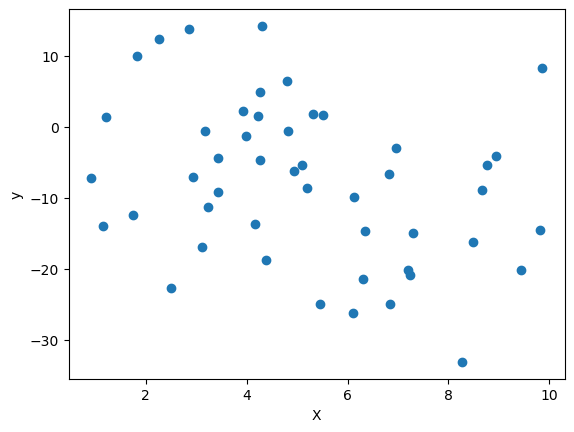

In [6]:
plt.scatter(train_linear_df['X'], train_linear_df['y'])
plt.xlabel('X')
plt.ylabel('y')

plt.show()

Now that we have the data, it is time to use a linear regression model on it! We do so by importing the model from the sklearn library.

In [7]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression(fit_intercept=True).fit(X=train_linear_df[['X']], y=train_linear_df['y'])

Our model is supposed to find the parameters that we originally used to generate the data! How hard it is for the model to find these depends on n (the number of data points) but also on the standard deviation that was used to add randomness to the data.

In [8]:
print('The trained model gives us a value of: {} for alpha and a value of: {} for beta.'.format(linear_regression_model.intercept_,
linear_regression_model.coef_[0]))

The trained model gives us a value of: -0.22617597061196104 for alpha and a value of: -1.4747575222292986 for beta.


We can now plot a line using the parameters that our linear regression model found to determine visually how close our model is to the data. We will first plot the model on the train data and test on the test data. 

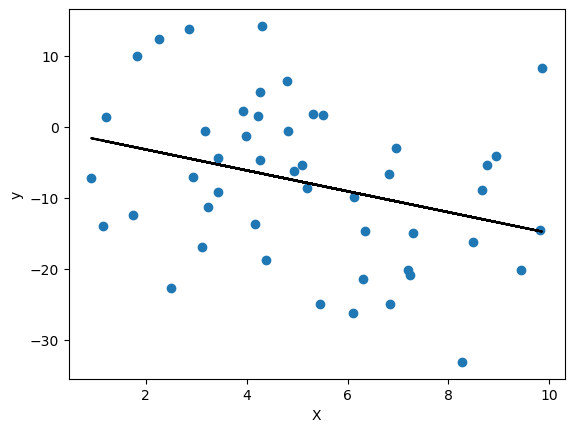

In [9]:
plt.scatter(train_linear_df['X'], train_linear_df['y'])
plt.plot(train_linear_df['X'], linear_regression_model.predict(train_linear_df[['X']]), color='k')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

We can do the same for the test set. The model was not trained on these data, yet it should do an alright job in prediction these values given that they were generated by the same distribution.

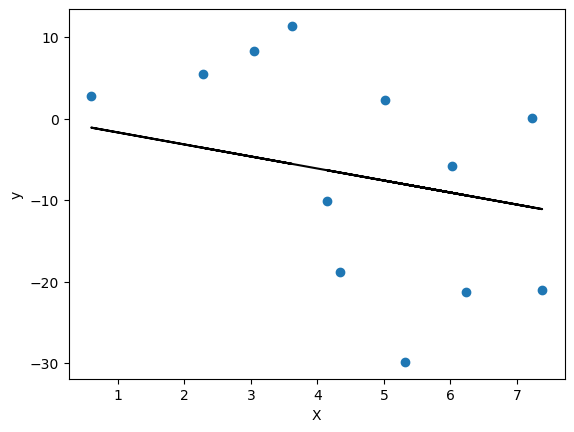

In [10]:
plt.scatter(test_linear_df['X'], test_linear_df['y'])
plt.plot(test_linear_df['X'], linear_regression_model.predict(test_linear_df[['X']]), color='k')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

We will now test our model on both the training data and the testing data. For performance assessment we will be using a metric called the "mean-squared-error". This is a metric for regression problems. 

For now the following intuition will do: the lower the metric, the better.

In [11]:
from sklearn.metrics import mean_squared_error
y_train_true = train_linear_df['y']
y_train_predict = linear_regression_model.predict(train_linear_df[['X']])
mean_squared_error(y_train_true, y_train_predict)


112.11885230669334

In [12]:
y_test_true = test_linear_df['y']
y_test_predict = linear_regression_model.predict(test_linear_df[['X']])
mean_squared_error(y_test_true, y_test_predict)

138.60601090720044

## Logistic Regression

![alt text](../../static/images/03_lecture/0007.jpg "Title")

![alt text](../../static/images/03_lecture/0008.jpg "Title")

For logistic regression we sort of stick with the linear data $z = \alpha +\beta X + \epsilon$. On top of it we use another function to map the data to probabilities and then to classes, but the details of it are outside the scope of this lecture.

In [13]:
def generate_dataset_logistic_regression(beta, n, std_dev, alpha):

  np.random.seed(123)

  # Generate x as an array of `n` samples which can take a value between 0 and 10
  X = np.random.uniform(-1, 1, n) * 1

  # Generate the random error of n samples, with a random value from a normal distribution, with a standard
  # deviation provided in the function argument
  e = np.random.randn(n) * std_dev

  # Calculate `y` according to the equation discussed
  z = alpha + X * beta + e
  pr = 1/(1+np.exp(-z)) 
  y = pr > 0.5 

  return X, y

Again, play with the parameters to change the generation of the data.

In [14]:
X_logistic, y_logistic = generate_dataset_logistic_regression(beta=100, n=100, std_dev=2, alpha=5)

In [15]:
logistic_df = pd.DataFrame(
    {
    'X' : X_logistic,
    'y' : y_logistic
    }
)


In [16]:
train_logistic_df, test_logistic_df = train_test_split(logistic_df, test_size=0.2, random_state=25)

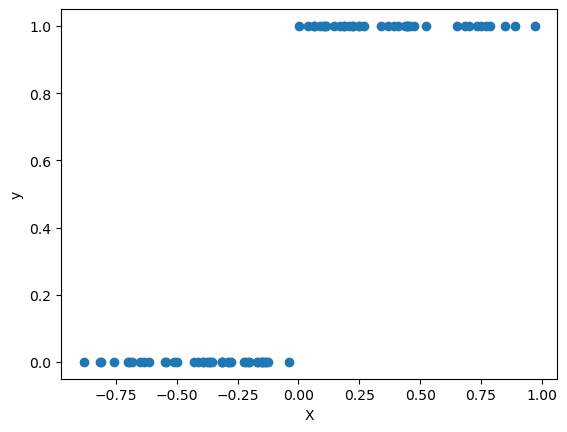

In [17]:
plt.scatter(train_logistic_df['X'], train_logistic_df['y'])
plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(fit_intercept=True) \
    .fit(X=train_logistic_df[['X']],
         y=train_logistic_df['y'])

We will again plot the as in the previous example. Note that there will be a cut-off point between the two classes. The cut-off point is place where the horizontal line (black striped) intersects with the red S-shaped curve. 

/usr/local/Caskroom/miniconda/base/envs/lecture03/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


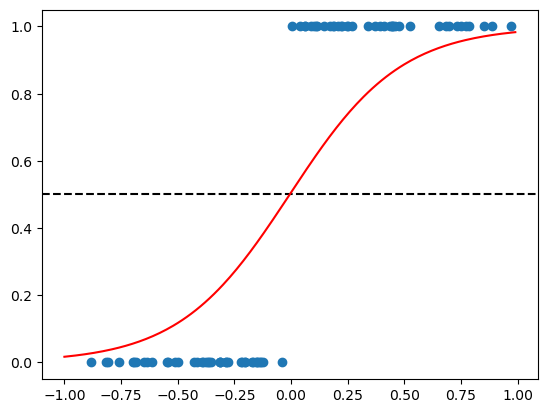

In [19]:
data_to_plot = np.arange(-1, 1, 0.01).reshape(-1, 1)
plt.scatter(train_logistic_df['X'], train_logistic_df['y'])
plt.axhline(y=0.5, color='black', linestyle='--')
plt.plot(data_to_plot, logistic_regression_model.predict_proba(data_to_plot)[:,1], linestyle='solid', label='Logistic regr', color='red')    

plt.show()


/usr/local/Caskroom/miniconda/base/envs/lecture03/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


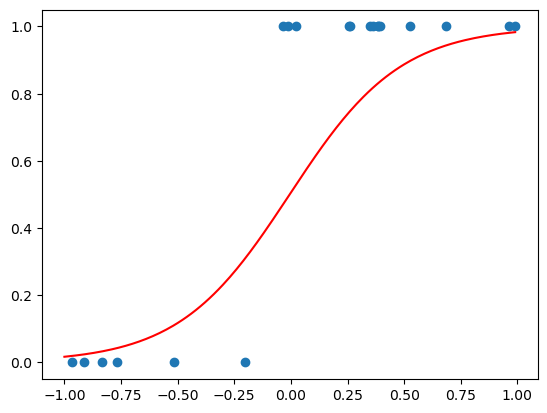

In [20]:
data_to_plot = np.arange(-1, 1, 0.01).reshape(-1, 1)
plt.scatter(test_logistic_df['X'], test_logistic_df['y'])
plt.plot(data_to_plot, logistic_regression_model.predict_proba(data_to_plot)[:,1], linestyle='solid', label='Logistic regr', color='red')    

plt.show()


For classification we cannot use the mean squared error. However, we can use the f1 metric. This metric goes from 0 to 1 and higher means better.

In [21]:
from sklearn.metrics import f1_score
y_train_true = train_logistic_df['y']
y_train_predict = logistic_regression_model.predict(train_logistic_df[['X']])
f1_score(y_train_true, y_train_predict)


1.0

In [22]:
y_test_true = test_logistic_df['y']
y_test_predict = logistic_regression_model.predict(test_logistic_df[['X']])
f1_score(y_test_true, y_test_predict)

0.923076923076923

## Clustering (Unspervised ML)

![alt text](../../static/images/03_lecture/0010.jpg "Title")

![alt text](../../static/images/03_lecture/0011.jpg "Title")

Visualization: https://www.youtube.com/watch?v=5I3Ei69I40s 


For Clustering we will not create our own function to generate the data. Instead we will rely on the make_blobs function that is part of sklearn.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
features, clusters = make_blobs(
                  n_samples = 2000,
                  n_features = 2, 
                  centers = 5,
                  cluster_std = 2,
                  shuffle = True)

Clustering is an unpervised method. This means thst the data we are looking at does not have a reponse. Instead, to make our problem more interesting, we are using two features. Note that the Y-axis now displays a second feature instead of the response (as was the case for regression and classification).

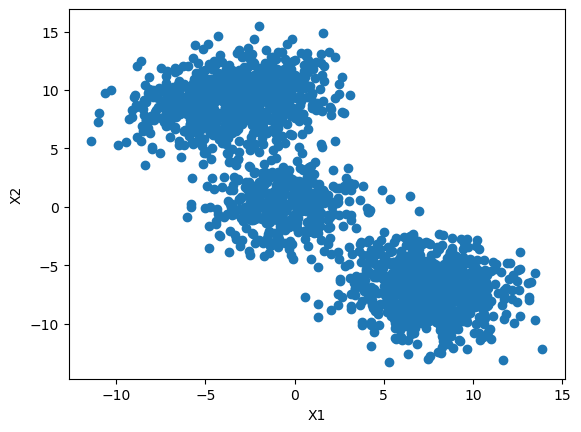

In [ ]:
plt.scatter(features[:,0], features[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
#Initialize the class object
kmeans = KMeans(n_clusters=5)
 
#predict the labels of clusters.
predictions = kmeans.fit_predict(features)

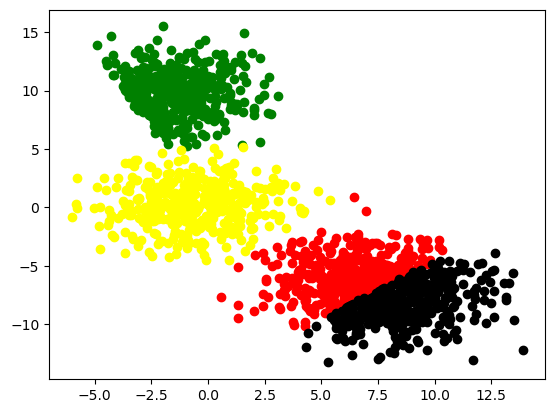

In [ ]:
#filter rows of original data
for label, colour in zip(range(4), ['red', 'green', 'yellow', 'black']):
    filtered_label = features[predictions == label]
    plt.scatter(filtered_label[:,0] , filtered_label[:,1] , color=colour)
plt.show()

Evaluation for clustering is a bit different. In contrast with the supervised methods of regression and classification, we do not have ground-true data. To determine whether our cluster algorithm did a good job, we need to take two things into account:

- The distance between the centers of clusters need to be far away. 
- The data points assigned to a particular cluster center need  to be as close to the center as possible.

These two points are balanced together in the silhouette_score. This score ranges from -1 to 1 and the higher the score the better.


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(features, predictions)

0.39676782393655824

## Exercises

We will fetch the Titanic dataset from sklearn. X contains some features regarding passenger characteristics of the Titanic. y contains their binary survival (0 for drown, 1 for survival).

In [ ]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('titanic', version=1, as_frame=True, return_X_y=True)
X.drop(['boat', 'body', 'home.dest', 'name', 'cabin', 'ticket'], axis=1, inplace=True)
X['age'] = X['age'].fillna(0)

We can describe the dataset like this:

In [ ]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,female,25.0000,1.0,2.0,151.5500,S


In [ ]:
X.describe()

,pclass,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,23.877515,0.498854,0.385027,33.295479
std,0.837836,17.590848,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,7.000000,0.000000,0.000000,7.895800
50%,3.000000,24.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


We want to see how many NA's we have in our data.

In [ ]:
round(X.isna().mean() * 100, 1)

pclass      0.0
sex         0.0
age         0.0
sibsp       0.0
parch       0.0
fare        0.1
embarked    0.2
dtype: float64

We found out that we have a few NA's in both fare and embarked and a lot in age. We are going to drop the rows with NA's in fare and embarked. For the missing values of age we will use an imputation method.

In [ ]:
mask = ~pd.isnull(X[['fare', 'embarked']]).any(1)
X, y = X[mask].reset_index(drop=True), y[mask].reset_index(drop=True)

# Exercise 1

A new Titanic is leaving Southamption, so for obvious purposes data from the first edition has to be re-examined.

A researcher is tasked to analyse data from the Titanic 1.0 and to come up with a model for survival probabilities. The tasks are the following: 


1a) Use sklearn's one-hot-encoder to encode the 'sex' and the 'embarked' features in the dataset.

1b) Use sklearn's linear regression model on the non-zero elements of the 'age' feature to predict the zero-elements of the 'age' feature.

1c) Use sklearns logistic regression model to predict the survival rate.

In [ ]:
#1a
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
X['sex'] = enc.fit_transform(X[['sex']])
X['embarked'] = enc.fit_transform(X[['embarked']])

In [ ]:
# 1b
from sklearn.linear_model import LinearRegression

# subselect data without age column, and where age is not null
reg = LinearRegression().fit(X.loc[:, X.columns != 'age'][X['age'] != 0], X['age'][X['age'] != 0])

# fill in where age is null
X['age'][X['age'] == 0] = list(reg.predict(X.loc[:, X.columns != 'age'][X['age'] == 0]))

In [ ]:

#1c 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X, y.values)
clf.predict(X)

# Exercise 2

We also want to marketeer our new Titanic and therefor we want to address specific groups of people. To setup a marketing campaign we want to lump Titanic passengers together in a smart way. After some discussion, a cluster analysis is agreed upon.


Apply a cluster analysis on the features 'fare' and 'age'. Determine which number of clusters (k) is the best. Plot your results.

In [ ]:
# reload the data to ensure that there are no hidden references

from sklearn.datasets import fetch_openml

X, y = fetch_openml('titanic', version=1, as_frame=True, return_X_y=True)
X.drop(['boat', 'body', 'home.dest', 'name', 'cabin', 'ticket'], axis=1, inplace=True)
X['age'] = X['age'].fillna(0)

mask = ~pd.isnull(X[['fare', 'embarked']]).any(1)
X, y = X[mask].reset_index(drop=True), y[mask].reset_index(drop=True)

In [ ]:
X_fare_age = X[['fare', 'age']]

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

results = []
for k in range(2, 10):
     kmeans = KMeans(n_clusters=k, ).fit(X_fare_age)
     predictions = kmeans.predict(X_fare_age)
     results.append(silhouette_score(X_fare_age, predictions))

In [ ]:
results

[0.7931545554874647,
 0.6170463417394,
 0.6131359802756283,
 0.4680636249354134,
 0.47855871010142054,
 0.4716804411067284,
 0.4767865970722949,
 0.4840815923051364]

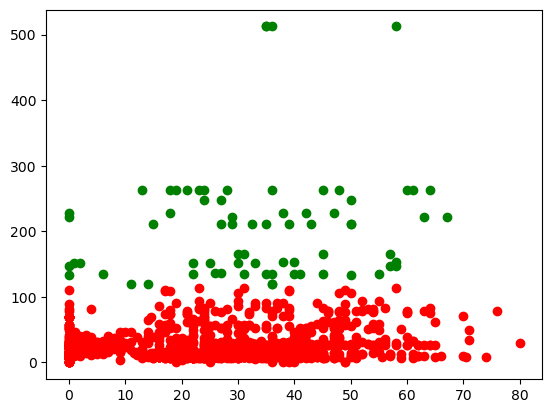

In [ ]:
# #Initialize the class object
kmeans_optimal = KMeans(n_clusters=2)
 
# #predict the labels of clusters.
predictions_optimal = kmeans_optimal.fit_predict(X_fare_age)

# # #filter rows of original data
for label, colour in zip(range(2), ['red', 'green']):
     filtered_label = X_fare_age[predictions_optimal == label]
     plt.scatter(filtered_label['age'] , filtered_label['fare'], color=colour)
plt.show()